# 词义的力量 

## —— 斯特鲁普效应实验数据分析 

# Words matter? 

## —— Data Analysis of Stroop Effect Experiment 

## 1. 前言 Introduction

### 1.1 斯特鲁普效应简介 Introduction of Stroop Effect 

当文字的颜色与字义不一致时，颜色会对反应时间产生干扰。1935年 John Ridley Stroop 发表了文章以后，该现象就被称为斯特鲁普效应（Stroop effect）[1]。具体的实验是：说出文字的颜色，而不是文字本身。比如“红色”这两个字以蓝色印刷（"RED" is printed in a blue colour），这时参与者读出“蓝色”（BLUE）[2]。当文字的字义与印刷的颜色一致时，称为 Congruent；不一致时，称为 Incongruent。实验发现 Incogruent 的时候，参与者阅读的时间更长，因此实验的结论是词义（semantic meaning）对颜色的识别产生了干扰，称为词义干扰（semantic interference）。

### 1.2 本项目总览 Project overview 

现有一份斯特鲁普效应的实验数据（随文件所带）。在此基础上拟进行的工作包括：

* 描述性统计
  * 用描述统计的方法分析实验数据
* 推论统计
  * 建立假设
  * 用样本数据进行假设检验
  * 得出检验结果
* 结论部分

## 2. 描述性统计 Descriptive statistics

两种实验数据，一种是 Congruent （词义与颜色一致），另一种是 Incongruent（词义与颜色不一致）。

为了进行后面的工作，先引入必要的 Python 包。

In [23]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

用 pandas 读入数据文件：

In [3]:
stroop = pd.read_csv('stroopdata.csv')

查看数据头部，确认数据读入正常：

In [4]:
stroop.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


用 numpy 分别对 Congruent 与 Incongruent 数据进行处理：

In [5]:
congruent = np.array(stroop['Congruent'])
incongruent = np.array(stroop['Incongruent'])

### 2.1 Congruent 部分数据描述性统计

**统计性描述结果：**

In [11]:
print("-"*5,"Congruent 部分","-"*5)
print("平均阅读时间（mean）：", congruent.mean())
print("方差（variance）：", congruent.var(ddof=1))  # ddof=1，表示除以 n-1
print("标准差（standard deviation）：", congruent.std(ddof=1))
print("最小值（min）：", congruent.min())
print("最大值（max）：", congruent.max())
print("第一四分位数（25th percentile）：", np.percentile(congruent, 25))
print("中位数（median）：", np.median(congruent))
print("第三四分位数（75th percentile）：", np.percentile(congruent, 75))
print("样本数量（sample size）：", congruent.size)

----- Congruent 部分 -----
平均阅读时间（mean）： 14.051125
方差（variance）： 12.6690290707
标准差（standard deviation）： 3.55935795765
最小值（min）： 8.63
最大值（max）： 22.328
第一四分位数（25th percentile）： 11.89525
中位数（median）： 14.3565
第三四分位数（75th percentile）： 16.20075
样本数量（sample size）： 24


**如果把数值都 round 到个位（round表示取值最靠近的整数）：**

In [12]:
print("-"*5,"Congruent 部分","-"*5)
print("平均阅读时间", np.round(congruent.mean()))
print("方差", np.round(congruent.var(ddof=1)))
print("标准差", np.round(congruent.std(ddof=1)))
print("最小值", np.round(congruent.min()))
print("最大值", np.round(congruent.max()))
print("第一四分位数", np.round(np.percentile(congruent, 25)))
print("中位数", np.round(np.median(congruent)))
print("第三四分位数", np.round(np.percentile(congruent, 75)))
print("样本数量", congruent.size)

----- Congruent 部分 -----
平均阅读时间 14.0
方差 13.0
标准差 4.0
最小值 9.0
最大值 22.0
第一四分位数 12.0
中位数 14.0
第三四分位数 16.0
样本数量 24


**数据的分布用盒形图（box plot）视觉化，没有出现异常值（outlier）。数据呈现正偏斜。**

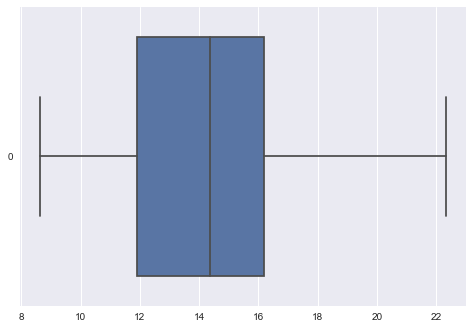

In [10]:
sns.boxplot(data=stroop['Congruent'], orient='h')

**直方图发现 Congruent 的样本数据接近正态分布，有一定程度的正偏斜（positive skewed）**

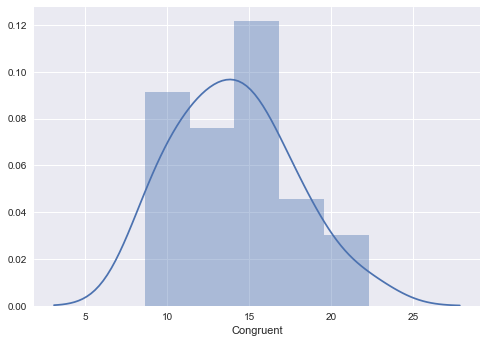

In [11]:
sns.distplot(stroop['Congruent'])

**用 rug 图也可以看见数据在 10-15 区间的密度较大。**

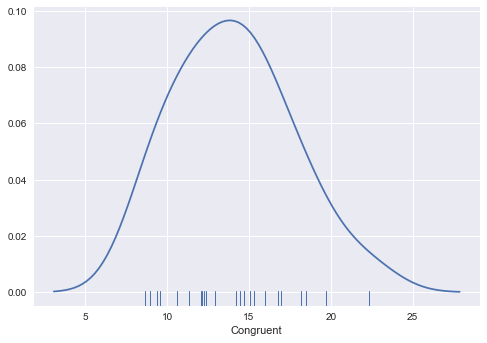

In [17]:
sns.distplot(stroop['Congruent'], hist=False, rug=True)

### 2.2 Incongruent 部分数据描述性统计

**统计性描述结果：**

In [13]:
print("-"*5,"Incongruent 部分","-"*5)
print("平均阅读时间：", incongruent.mean())
print("方差：", incongruent.var(ddof=1))
print("标准差：", incongruent.std(ddof=1))
print("最小值：", incongruent.min())
print("最大值：", incongruent.max())
print("第一四分位数", np.percentile(incongruent, 25))
print("中位数：", np.median(incongruent))
print("第三四分位数", np.percentile(incongruent, 75))
print("样本数据：", incongruent.size)

----- Incongruent 部分 -----
平均阅读时间： 22.0159166667
方差： 23.0117570362
标准差： 4.79705712247
最小值： 15.687
最大值： 35.255
第一四分位数 18.71675
中位数： 21.0175
第三四分位数 24.0515
样本数据： 24


**盒形图中发现 Incongruent 数据中最大的两个值是异常值**

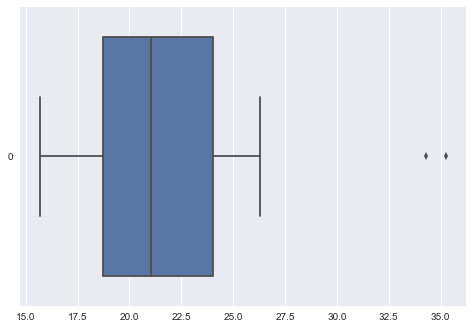

In [20]:
sns.boxplot(data=stroop['Incongruent'], orient='h')

用直方图发现出现了两个峰。

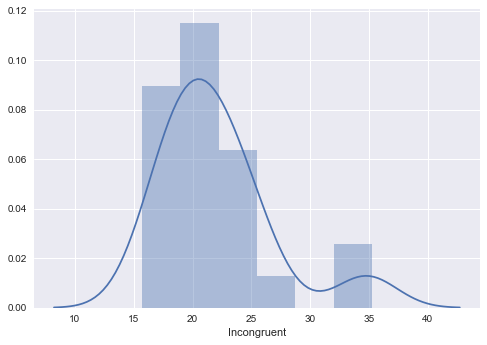

In [31]:
sns.distplot(stroop['Incongruent'])

较小的峰是由两个异常值产生的。

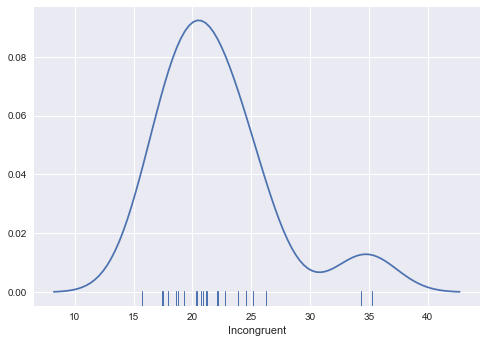

In [32]:
sns.distplot(stroop['Incongruent'], hist=False, rug=True)

**设置函数删除异常值，输入参数分别是 **：
* 需要删除异常值的 numpy array
* 异常值常数（outlierConstant，一般是1.5）
* IQR 表示 Interquartile ranges

In [16]:
def removeOutliers(nparray, outlierConstant):
    """
    to remove the outliers for a numpy array,
    return a new numpy array without outliers
    """
    upper_quartile = np.percentile(nparray, 75)
    lower_quartile = np.percentile(nparray, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    #  print(IQR)
    #  print (quartileSet)
    resultList = []
    for y in nparray.tolist():
        if y > quartileSet[0] and y < quartileSet[1]:
            resultList.append(y)
    resultList_nparray = np.array(resultList)
    return resultList_nparray

Incongruent 数据，在删除异常值之前先备份，并且确定样本数量是 24。

In [14]:
incongruent_old = incongruent
print(incongruent_old)
print("Sample size: ", incongruent_old.size)

[ 19.278  18.741  21.214  15.687  22.803  20.878  24.572  17.394  20.762
  26.282  24.524  18.644  17.51   20.33   35.255  22.158  25.139  20.429
  17.425  34.288  23.894  17.96   22.058  21.157]
Sample size:  24


用 removeOUtliers 函数处理 incongruent 数据之后，可以发现数组中的两个异常值已经被删除。

In [17]:
incongruent = removeOutliers(incongruent, 1.5) 
print(incongruent)
print("Sample size: ", incongruent.size)

[ 19.278  18.741  21.214  15.687  22.803  20.878  24.572  17.394  20.762
  26.282  24.524  18.644  17.51   20.33   22.158  25.139  20.429  17.425
  23.894  17.96   22.058  21.157]
Sample size:  22


再次用盒形图确认没有异常值了。

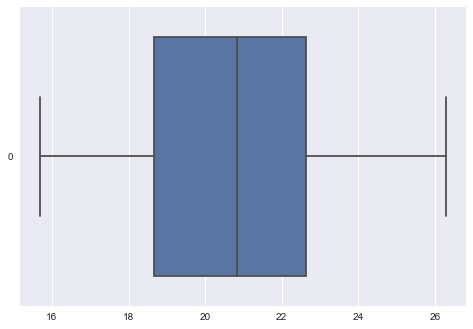

In [18]:
incongruent_dataframe = pd.DataFrame(data=incongruent)
sns.boxplot(data=incongruent_dataframe, orient='h')

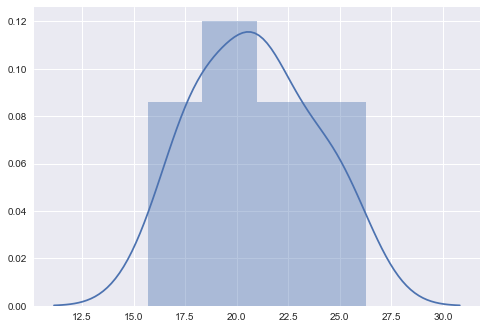

In [19]:
sns.distplot(incongruent_dataframe)

取样分布也只剩一个峰，接近于正态分布。

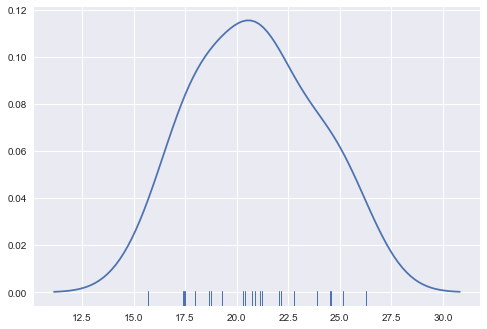

In [20]:
sns.distplot(incongruent_dataframe, hist=False, rug=True)

再次计算 Incongruent 部分描述性统计数据

In [21]:
print("-"*5,"Incongruent 部分","-"*5)
print("平均阅读时间：", incongruent.mean())
print("方差：", incongruent.var(ddof=1))
print("标准差：", incongruent.std(ddof=1))
print("最小值：", incongruent.min())
print("最大值：", incongruent.max())
print("第一四分位数", np.percentile(incongruent, 25))
print("中位数：", np.median(incongruent))
print("第三四分位数", np.percentile(incongruent, 75))
print("样本数据：", incongruent.size)

----- Incongruent 部分 -----
平均阅读时间： 20.8563181818
方差： 8.27668308442
标准差： 2.87692250233
最小值： 15.687
最大值： 26.282
第一四分位数 18.66825
中位数： 20.82
第三四分位数 22.64175
样本数据： 22


### 2.3 描述性统计部分总结
对斯特鲁普效应实验的数据进行了描述性统计分析。用盒形图发现 Incongruent 在最大值方向有两个异常值。用 removeOutliers 函数删除了异常值，并形成新的 numpy array。

最终得到两个数组如下所示。后面的推论统计部分将在这两个数据的基础上进行。

In [34]:
congruent

array([ 12.079,  16.791,   9.564,   8.63 ,  14.669,  12.238,  14.692,
         8.987,   9.401,  14.48 ,  22.328,  15.298,  15.073,  16.929,
        18.2  ,  12.13 ,  18.495,  10.639,  11.344,  12.369,  12.944,
        14.233,  19.71 ,  16.004])

In [35]:
incongruent

array([ 19.278,  18.741,  21.214,  15.687,  22.803,  20.878,  24.572,
        17.394,  20.762,  26.282,  24.524,  18.644,  17.51 ,  20.33 ,
        22.158,  25.139,  20.429,  17.425,  23.894,  17.96 ,  22.058,
        21.157])

## 3. 推论统计 Inference statistics

### 3.1 结论预览
双样本的零假设为两种实验结果一样。T检验结果表明：实验结果的 t 值为-7.16，实验结果一致的概率 P = 7.30e-9，远小于 0.1%。即使按照 99.9% 的要求，零假设也被拒绝。结论意味着两种实验的结果并不一致，Congruent 实验的平均阅读时间确实小于 Incongruent 的平均阅读时间。

In [24]:
stats.ttest_ind(a= congruent,
                b= incongruent,
                equal_var=False)

Ttest_indResult(statistic=-7.1570631082927409, pvalue=7.2985081437058256e-09)

即使 Incongruent 数据的异常值没有排除，也是一样的结论。

In [25]:
stats.ttest_ind(a= congruent,
                b= incongruent_old,
                equal_var=False)

Ttest_indResult(statistic=-6.5322505539032285, pvalue=6.5101673904426379e-08)

下面按照推论统计的步骤详细推导。

### 3.2 确定变量类型